<a href="https://colab.research.google.com/github/samsoe/mpg_notebooks/blob/master/Visualization_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bigquery api access
install.packages("bigrquery")
install.packages("httpuv")
install.packages("googleAuthR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘bit64’, ‘gargle’, ‘rapidjsonr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(bigrquery)
library(httpuv)
library(tidyr)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [0]:
 # BigQuery API Key
bq_auth(path = "/content/mpg-data-warehouse-34434e1a9914.json")

In [0]:
Sys.setenv(BIGQUERY_TEST_PROJECT = "mpg-data-warehouse")

In [0]:
billing <- bq_test_project()

In [0]:
con <- dbConnect(
  bigrquery::bigquery(),
  project = "mpg-data-warehouse",
  dataset = "mpg_kmso_precip",
  billing = billing
)

In [0]:
sql <- "SELECT 
           *
        FROM 
          `mpg-data-warehouse.weather_views.mpg_kmso_precip`
        ORDER BY
          day"

In [0]:
tb <- bq_project_query(billing, sql)

In [0]:
weather <- bq_table_download(tb)

In [0]:
weather <- as.data.frame(weather)

In [0]:
weather$year <- as.numeric(format(as.Date(weather$day), '%Y'))

In [0]:
weather$jd <- format(weather$day, '%j')

In [0]:
weather$jd <- as.numeric(weather$jd)

In [15]:
head(weather)

,day,baldy_draw,baldy_summit,indian_ridge,orchard_house,sanfoin_bench,south_baldy,kmso,year,jd
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2012-06-19,0.0,0.0,NA,0.0,0.0,0,0.13,2012,171
2,2012-06-20,0.0,0.1,NA,0.0,0.0,0,0.04,2012,172
3,2012-06-21,0.0,0.0,NA,0.0,0.0,0,0.00,2012,173
4,2012-06-22,0.1,0.0,NA,0.1,0.1,0,0.00,2012,174
5,2012-06-23,0.0,0.0,NA,0.0,0.0,0,0.03,2012,175
6,2012-06-24,0.0,0.0,NA,0.0,0.0,0,0.61,2012,176


In [0]:
# library for larger plots
library(repr)

In [0]:
options(repr.plot.width=12, repr.plot.height=12)

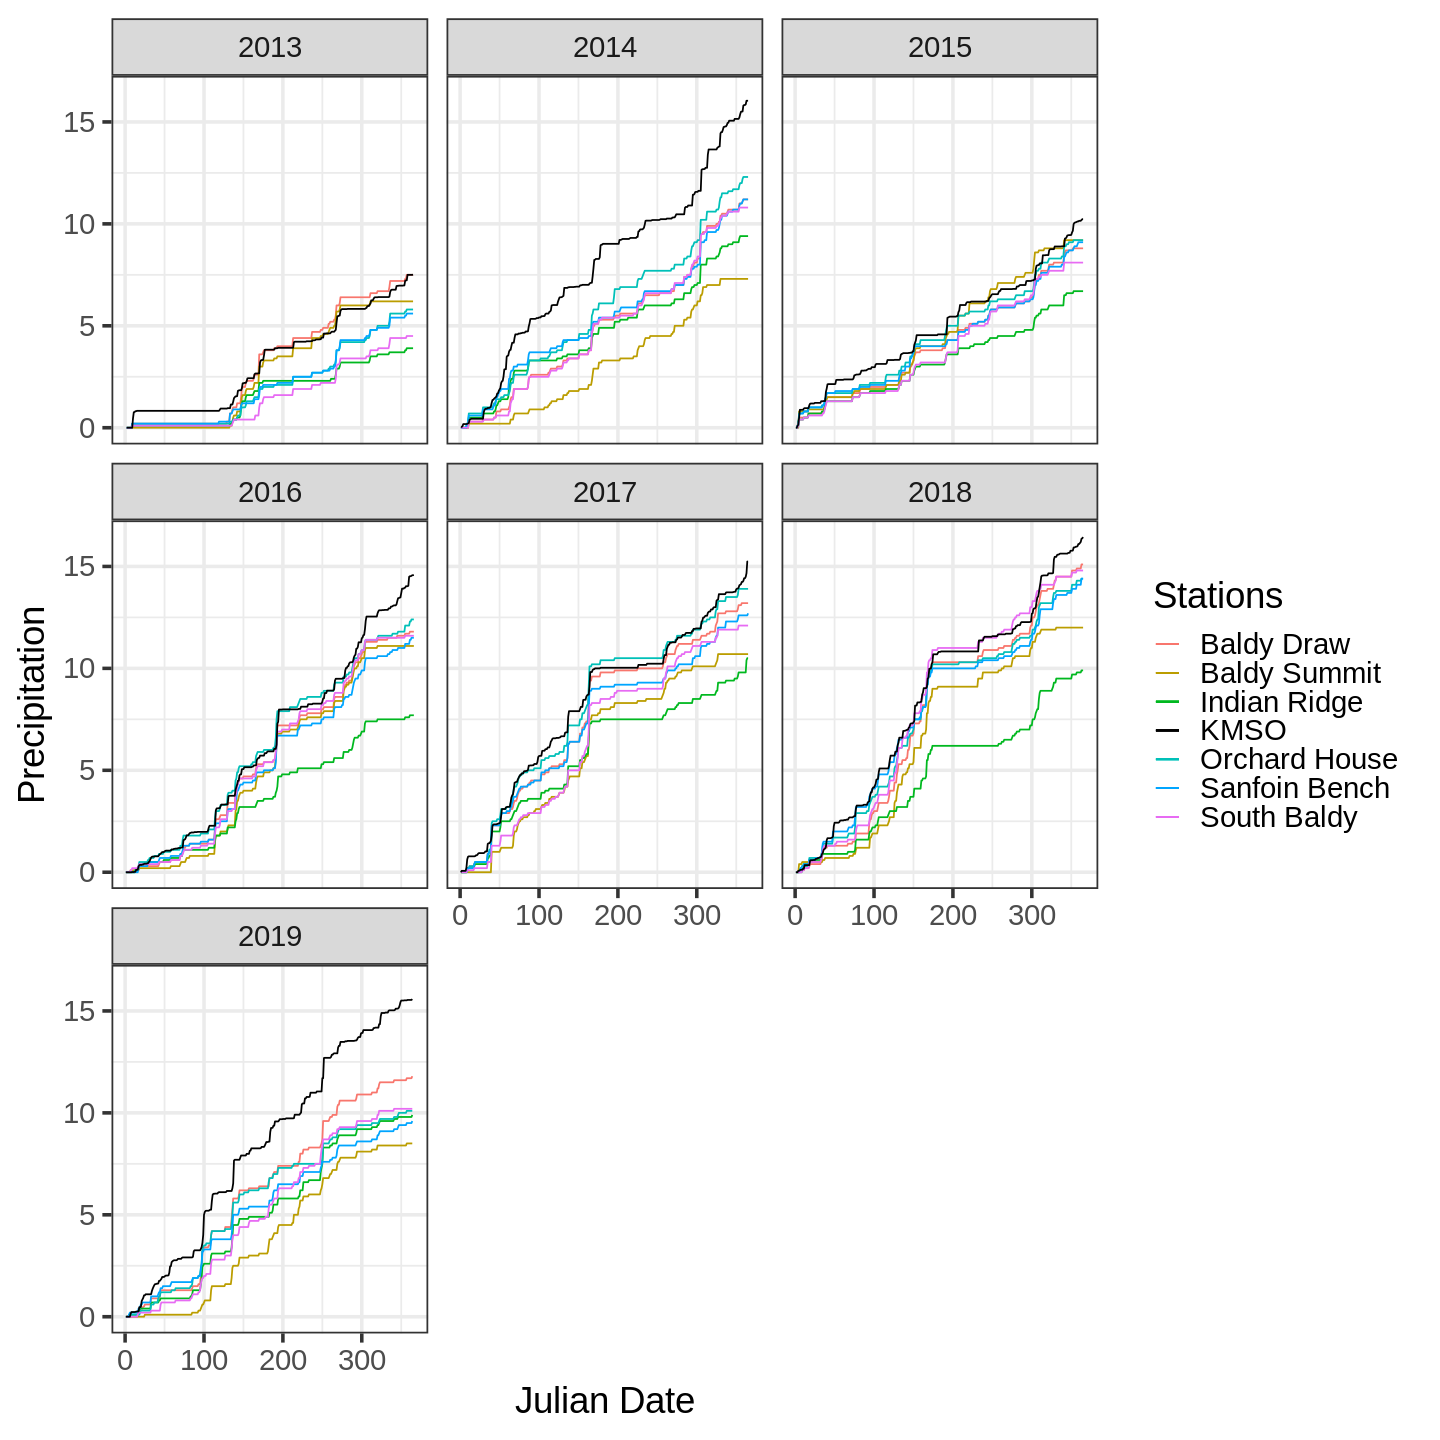

In [18]:
weather %>%
  group_by(year) %>%
  filter(day > "2013-01-01" & day < "2019-12-31") %>%
  mutate(baldy_draw=cumsum(baldy_draw)) %>%
  mutate(baldy_summit=cumsum(baldy_summit)) %>%
  mutate(indian_ridge=cumsum(indian_ridge)) %>%
  mutate(orchard_house=cumsum(orchard_house)) %>%
  mutate(sanfoin_bench=cumsum(sanfoin_bench)) %>%
  mutate(south_baldy=cumsum(south_baldy)) %>%
  mutate(kmso=cumsum(kmso)) %>%
  ggplot(aes(x=jd)) +
  geom_line(mapping=aes(y=baldy_draw, color="Baldy Draw")) +
  geom_line(mapping=aes(y=baldy_summit, color="Baldy Summit")) +
  geom_line(mapping=aes(y=indian_ridge, color="Indian Ridge")) +
  geom_line(mapping=aes(y=orchard_house, color="Orchard House")) +
  geom_line(mapping=aes(y=sanfoin_bench, color="Sanfoin Bench")) +
  geom_line(mapping=aes(y=south_baldy, color="South Baldy")) +
  geom_line(mapping=aes(y=kmso, color="KMSO")) +
  scale_color_manual(values = c(
    'Baldy Draw' = '#F8766D',
    'Baldy Summit' = '#BB9D00',
    'Indian Ridge' = '#00B81F',
    'Orchard House' = '#00C0B8',
    'Sanfoin Bench' = '#00A5FF',
    'South Baldy' = '#E76BF3',
    'KMSO' = 'black'
  )) +
  labs(color = 'Stations') +
  facet_wrap(~ year) +
  theme_bw(base_size = 22) +
  ylab("Precipitation") +
  xlab("Julian Date")